# **5 - Multivariate Testing**

Experimental Design and A/B testing


# <font color='blue'>1. Topic Review</font>
---


* **Multivariate testing** is an experiment that tests more than one variables or elements at the same time, to understand their effects.

* Multivariate testing is **different** from A/B/N testing :
  * A/B/N testing is like an A/B testing but have N (more than two) version, with radical changes or version to see which version is the best.

  * Multivariate testing involves pick a certain number of elements on a page and simultaneously test multiple combinations of them to understand which combination provides the best results.

* The summarise of the main differences between A/B/N testing and Multivariate Testing :

<center>

||A/B or A/B/N testing|Multivariate Testing|
|:--|:--:|:--:|
|What can you test?|Different layouts, designs or changes to single elements|Effects of changes to combinations of elements|
|Traffic Required|Relatively low|High|
|Time required for meaningful results|Short|Considerably longer|
|Best used for|Significantly different layouts & designs or low traffic sites|Optimizing combinations of elements|

</center>

- **Issue of Multiple Hypothesis Testing**

  - If we have more than two group of variant in our experiment, for analyze the result, we will conduct **multiple hypothesis testing**.
  - But, there is a problem for conducting multiple hypothesis testing
  The main issue of multiple testing is **increasing in Type I errors**.
  - To overcome this, we need corection with **Benjamini-Hochberg correction method**

# <font color='blue'>2. Case 1 : Web Page XYZ Company </font>
---


- XYZ company is an e-commerce that sells various products through the website.
- They wants to optimize the design of a live product-detail page in order to maximize conversions for adding the item to the user’s cart.
- They are considering several possible changes:
  - Change the visual element, using a video of a product instead of an image
  - Changing the label of the main call-to-action button from Buy Now to Add to Cart

The following image is a design that will be carried out experiments to find out which combination is the best.

<img src='https://sekolahdata-assets.s3.ap-southeast-1.amazonaws.com/notebook-images/mds-ab-testing/notebook_10_pict_1.png'>

Two variables or elements that have each 2 variants leads to **4 design** variations in a multivariate experiment, to represent all the possible combinations of these variants.

Here are the 4 combinations in XYZ company website.

<img src='https://sekolahdata-assets.s3.ap-southeast-1.amazonaws.com/notebook-images/mds-ab-testing/notebook_10_pict_2.png'>

- After a few weeks of experimenting, they got the data.
- Help the XYZ company to analyze the experimental results!

In [8]:
# Import this library first
import numpy as np
import pandas as pd

In [ ]:
# Initialization filename
filename = "ecommerce_multivariatetest.csv"

# Import data
data = pd.read_csv(filename)

# Display 5 top rows of the data
data.head()

,user_id,visual,button,group,convert
0,11115722,video,buy_now,C,0
1,11122053,image,buy_now,A,0
2,11128688,video,buy_now,C,0
3,11130578,video,buy_now,C,0
4,11130759,image,buy_now,A,0


There are 5 columns (`user_id`, `visual`, `button`, `group` and `purchase`)
- `user_id` : id user
- `visual` : visual appearance on the landing page, whether images or videos
- `button` : button text, whether buy now or add to chart
- `group` : a group that represents a combination of visual elements (image or video) and button text (buy now or add to chart).

  - Group A : image + buy now (existing variant / control)
  - Group B : image + add to chart
  - Group C : video + buy now
  - Group D : video + add to chart

- `convert` : if 1 : user convert, if 0 : user not convert

In [ ]:
# Checking duplicate data
data.duplicated(['user_id']).sum()

np.int64(0)

In [ ]:
# Checking missing value
data.isna().sum()

,0
user_id,0
visual,0
button,0
group,0
convert,0


In [ ]:
# Get data shape
data.shape

(200, 5)

In [ ]:
#Overview data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  200 non-null    int64 
 1   visual   200 non-null    object
 2   button   200 non-null    object
 3   group    200 non-null    object
 4   convert  200 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 7.9+ KB


We need to make sure that there is no wrong group.

  - Group A should contain visual **image** and button **buy now**
  - Group B should contain visual **image** and button **add to chart**
  - Group C should contain visual **video** and button **buy now**
  - Group D should contain visual **video** and button **add to chart**

- Find the wrong group in group A
    - group : `A`
    - correct combination : `image` + `buy_now`
    - wrong combination 1 : `image` + `add_to_chart`
    - wrong combination 2 : `video` + `add_to_chart`
    - wrong combination 3 : `video` + `buy_now`

In [ ]:
# Check for non-matching groups & elements
group_name = "A"
type_visual = "image"
type_button = "buy_now"

# Make condition
condition_group = data["group"] == group_name
condition_visual = data["visual"] == type_visual
condition_button = data["button"] == type_button

# Select data with the conditions above
data_salah_1 = data[condition_group & ~(condition_visual & condition_button)]

In [9]:
# display wrong data
data_salah_1.head()

,user_id,visual,button,group,convert


- Find the wrong group in group B
    - group : `B`
    - correct combination : `image` + `add_to_chart`
    - wrong combination 1 : `image` + `video`
    - wrong combination 2 : `video` + `add_to_chart`
    - wrong combination 3 : `video` + `buy_now`

In [10]:
# Check for non-matching groups & elements
group_name = "B"
type_visual = "image"
type_button = "add_to_chart"

# Make condition
condition_group = data["group"] == group_name
condition_visual = data["visual"] == type_visual
condition_button = data["button"] == type_button

# Select data with the conditions above
data_salah_2 = data[condition_group & ~(condition_visual & condition_button)]

In [11]:
# display wrong data
data_salah_2.head()

,user_id,visual,button,group,convert


- Find the wrong group in group C
    - group : `C`
    - correct combination : `video` + `buy_now`
    - wrong combination 1 : `image` + `add_to_chart`
    - wrong combination 2 : `video` + `add_to_chart`
    - wrong combination 3 : `image` + `buy_now`

In [12]:
# Check for non-matching groups & elements
group_name = "C"
type_visual = "video"
type_button = "buy_now"

# Make condition
condition_group = data["group"] == group_name
condition_visual = data["visual"] == type_visual
condition_button = data["button"] == type_button

# Select data with the conditions above
data_salah_3 = data[condition_group & ~(condition_visual & condition_button)]

In [13]:
# display wrong data
data_salah_3.head()

,user_id,visual,button,group,convert


- Find the wrong group in group D
    - group : `D`
    - correct combination : `video` + `add_to_chart`
    - wrong combination 1 : `image` + `add_to_chart`
    - wrong combination 2 : `image` + `buy_now`
    - wrong combination 3 : `video` + `buy_now`

In [14]:
# Check for non-matching groups & elements
group_name = "D"
type_visual = "video"
type_button = "add_to_chart"

# Make condition
condition_group = data["group"] == group_name
condition_visual = data["visual"] == type_visual
condition_button = data["button"] == type_button

# Select data with the conditions above
data_salah_4 = data[condition_group & ~(condition_visual & condition_button)]

In [15]:
# display wrong data
data_salah_4.head()

,user_id,visual,button,group,convert


#### **Calculate convertion rate**
---

Since we want to know the convertion rate in each group, fill in the following table!

<center>

|Group|#User|#Convert|Convertion Rate
|:--|:--:|:--:|:--:|
|A|-|-|-|
|B|-|-|-|
|C|-|-|-|
|D|-|-|-|

</center>

In [16]:
# Make data in group A
data_A = data[data["group"] == "A"]

data_A.head()

,user_id,visual,button,group,convert
1,11122053,image,buy_now,A,0
4,11130759,image,buy_now,A,0
10,11136982,image,buy_now,A,0
11,11140660,image,buy_now,A,0
14,11148089,image,buy_now,A,0


In [17]:
# Make data in group B
data_B = data[data["group"] == "B"]

data_B.head()

,user_id,visual,button,group,convert
8,11132813,image,add_to_chart,B,0
9,11134390,image,add_to_chart,B,0
12,11143138,image,add_to_chart,B,0
13,11146038,image,add_to_chart,B,0
15,11148343,image,add_to_chart,B,0


In [18]:
# Make data in group C
data_C = data[data["group"] == "C"]

data_C.head()

,user_id,visual,button,group,convert
0,11115722,video,buy_now,C,0
2,11128688,video,buy_now,C,0
3,11130578,video,buy_now,C,0
5,11131070,video,buy_now,C,0
7,11131664,video,buy_now,C,0


In [19]:
# Make data in group D
data_D = data[data["group"] == "D"]

data_D.head()

,user_id,visual,button,group,convert
6,11131381,video,add_to_chart,D,1
21,11156956,video,add_to_chart,D,1
35,11176494,video,add_to_chart,D,1
37,11179295,video,add_to_chart,D,1
38,11183316,video,add_to_chart,D,1


In [20]:
# Count users in group A
n_A = data_A.shape[0]

n_A

50

In [21]:
# Count users in group B
n_B = data_B.shape[0]

n_B

50

In [22]:
# Count users in group C
n_C = data_C.shape[0]

n_C

50

In [23]:
# Count users in group D
n_D = data_D.shape[0]

n_D

50

In [24]:
# group A
n_convertA = data_A['convert'].sum()

n_convertA

np.int64(19)

In [25]:
# group B
n_convertB = data_B['convert'].sum()

n_convertB

np.int64(21)

In [26]:
# group C
n_convertC = data_C['convert'].sum()

n_convertC

np.int64(20)

In [27]:
# group D
n_convertD = data_D['convert'].sum()

n_convertD

np.int64(32)

In [28]:
cr_A = n_convertA/n_A
cr_B = n_convertB/n_B
cr_C = n_convertC/n_C
cr_D = n_convertD/n_D

print(f"convertion rate A : {cr_A:.2f}")
print(f"convertion rate B : {cr_B:.2f}")
print(f"convertion rate C : {cr_C:.2f}")
print(f"convertion rate D : {cr_D:.2f}")

convertion rate A : 0.38
convertion rate B : 0.42
convertion rate C : 0.40
convertion rate D : 0.64


Result :

<center>

|Group|#User|#Convert|Convertion Rate
|:--|:--:|:--:|:--:|
|A|50|19| 0.38|
|B|50|21|0.42|
|C|50|20|0.40|
|D|50|32|0.64|

</center>

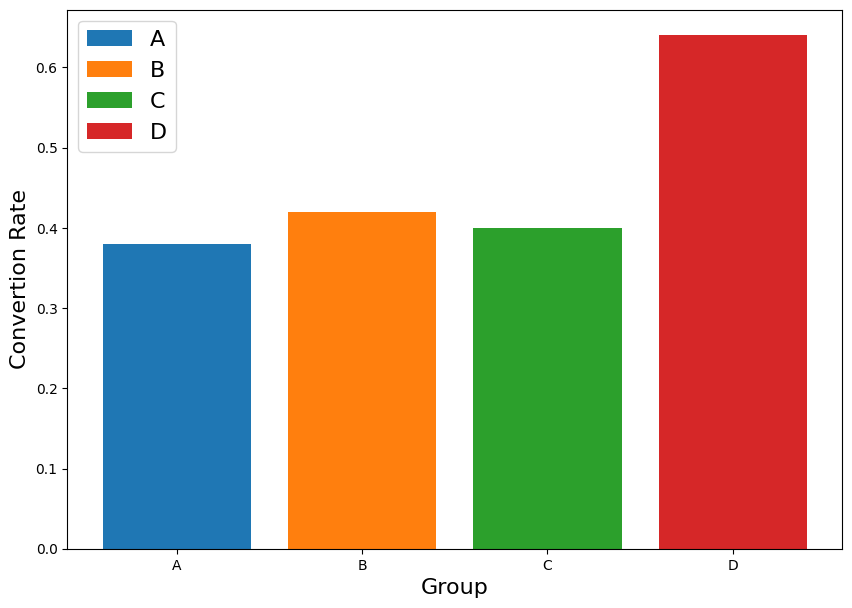

In [29]:
# visualisasi perbandingan convertion rate tiap grup
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

# Buat plot
ax.bar("A", cr_A, label="A")
ax.bar("B", cr_B, label="B")
ax.bar("C", cr_C, label="C")
ax.bar("D", cr_D, label="D")

# Styling plot
ax.set_ylabel("Convertion Rate", fontsize=16)
ax.set_xlabel("Group", fontsize=16)

plt.legend(fontsize=16)
plt.show();

#### **Multiple Hypothesis Testing with Benjamini-Hochberg Correction**
---

- To find out which one is the best, we can do a hypothesis testing.
- A suitable hypothesis test for this case is the z-test for proportion.
- Because we have more than two groups to compare, therefore we perform multiple hypothesis testing for each group pair.
- An issue with multiple hypothesis testing is increasing of Type I error, so we can do correction with Benjamini-Hochberg Correction

**The following is the stage for conducting the analysis :**

##### 1. Define null hypothesis ($H_0$) and alternative hypothesis ($H_1$)

We want to compare whether group $i$ th is more than group $j$ th, so we use one sided (right tail) hypothesis testing.

we want to prove whether the conversion rate of group $j$ is greater than the conversion rate of group $i$

The hypothesis for each group pair is as follows:
- group A vs group B
    $$H_0 : p_B \leq p_A$$
    $$H_1 : p_B > p_A$$

- group A vs group C
    $$H_0 : p_C \leq p_A$$
    $$H_1 : p_C > p_A$$

- group A vs group D
    $$H_0 : p_D \leq p_A$$
    $$H_1 : p_D > p_A$$

- group B vs group C
    $$H_0 : p_C \leq p_B$$
    $$H_1 : p_C > p_B$$

- group B vs group D
    $$H_0 : p_D \leq p_B$$
    $$H_1 : p_D > p_B$$

- group C vs group D
    $$H_0 : p_D \leq p_C$$
    $$H_1 : p_D > p_C$$

In [30]:
#import library
from statsmodels.stats.proportion import proportions_ztest

# call function
#p-value group A vs group B hypotesis test
p_value_AB = proportions_ztest(count = [n_convertB, n_convertA],
                               nobs = [n_B, n_A],
                               alternative = 'larger')[1]

print(f"P-value A vs B: {p_value_AB:.4f}")

P-value A vs B: 0.3415


In [31]:
#p-value group A vs group C hypotesis test
p_value_AC = proportions_ztest(count = [n_convertC, n_convertA],
                               nobs = [n_C, n_A],
                               alternative = 'larger')[1]

print(f"P-value A vs C: {p_value_AC:.4f}")

P-value A vs C: 0.4188


In [32]:
#p-value group A vs group D hypotesis test
p_value_AD = proportions_ztest(count = [n_convertD, n_convertA],
                               nobs = [n_D, n_A],
                               alternative = 'larger')[1]

print(f"P-value A vs D: {p_value_AD:.4f}")

P-value A vs D: 0.0047


In [33]:
#p-value group B vs group C hypotesis test
p_value_BC = proportions_ztest(count = [n_convertC, n_convertB],
                               nobs = [n_C, n_B],
                               alternative = 'larger')[1]

print(f"P-value B vs C: {p_value_BC:.4f}")

P-value B vs C: 0.5806


In [34]:
#p-value group B vs group D hypotesis test
p_value_BD = proportions_ztest(count = [n_convertD, n_convertB],
                               nobs = [n_D, n_B],
                               alternative = 'larger')[1]

print(f"P-value B vs D: {p_value_BD:.4f}")

P-value B vs D: 0.0138


In [35]:
#p-value group C vs group D hypotesis test
p_value_CD = proportions_ztest(count = [n_convertD, n_convertC],
                               nobs = [n_D, n_C],
                               alternative = 'larger')[1]

print(f"P-value C vs D: {p_value_CD:.4f}")

P-value C vs D: 0.0082


In [36]:
# make dataframe consist of p-values
pair_group = ['B > A',
              'C > A',
              'D > A',
              'C > A',
              'D > B',
              'D > C']

p_vals = [p_value_AB, p_value_AC,
          p_value_AD, p_value_BC,
          p_value_BD, p_value_CD]

df_p_vals = pd.DataFrame({'pair_group': pair_group,
                          'p-value': p_vals})

#print
df_p_vals

,pair_group,p-value
0,B > A,0.341546
1,C > A,0.418777
2,D > A,0.004654
3,C > A,0.580558
4,D > B,0.013763
5,D > C,0.008155


In [37]:
df_p_vals_order = df_p_vals.sort_values(by=['p-value'])
df_p_vals_order

,pair_group,p-value
2,D > A,0.004654
5,D > C,0.008155
4,D > B,0.013763
0,B > A,0.341546
1,C > A,0.418777
3,C > A,0.580558


In [38]:
df_p_vals_order['rank'] = df_p_vals_order['p-value'].rank().sub(0).astype(int)
df_p_vals_order

,pair_group,p-value,rank
2,D > A,0.004654,1
5,D > C,0.008155,2
4,D > B,0.013763,3
0,B > A,0.341546,4
1,C > A,0.418777,5
3,C > A,0.580558,6


Using the formula :

$$\text{BH-critical value} = \left ( \frac{i}{m} \right )Q$$


where:
- $i$ = the p-value’s rank
- $m$ = total number of tests
- $Q$ = the false discovery rate (chosen by the experimenter)


In [39]:
#define Q
Q = 0.05

#calculate BH-critical value
df_p_vals_order['BH-crit'] = df_p_vals_order['rank']/len(df_p_vals_order)*Q

#print
df_p_vals_order

,pair_group,p-value,rank,BH-crit
2,D > A,0.004654,1,0.008333
5,D > C,0.008155,2,0.016667
4,D > B,0.013763,3,0.025000
0,B > A,0.341546,4,0.033333
1,C > A,0.418777,5,0.041667
3,C > A,0.580558,6,0.050000


In [40]:
# make new column with condition
df_p_vals_order['Significant?'] = np.where(df_p_vals_order['p-value'] < df_p_vals_order['BH-crit'],
                                           'Yes',
                                           'No')

#print
df_p_vals_order

,pair_group,p-value,rank,BH-crit,Significant?
2,D > A,0.004654,1,0.008333,Yes
5,D > C,0.008155,2,0.016667,Yes
4,D > B,0.013763,3,0.025000,Yes
0,B > A,0.341546,4,0.033333,No
1,C > A,0.418777,5,0.041667,No
3,C > A,0.580558,6,0.050000,No


**Conclusion**
- Based on the results of multiple testing, test for group A vs group D, group D vs group C, and group D vs group B resulted a significant outcome.
- Because our hypothesis is to compare whether group $j$ is more than group $i$, so it can be concluded that there is sufficient evidence that the conversion rate of group D (video + add to chart button) is higher than groups A, B and C.
- Group D is the group that has the highest conversion rate among all groups.
- Group D becomes the winning version of the 4 combinations of the XYZ company website.
- It means that changing visuals to video and buttons to add to charts statistically has an impact on increasing conversion rates.

# <font color='blue'>3. Case 2 : Experiment in Bank </font>
---


- A wide known bank has recently run run a split test for landing pages.
- Their landing page consists of advertising a direct marketing campaign to encourage credit card users to make more transactions using their credit card.
- They expect that the more users make transactions using their credit cards, the more the bank will get more profit
- They have two option of new marketing video.
- They do not know yet, which one perform the best.
- The existing page is their default text-based page campaign ad.
- While the test page consist of two version of new marketing video.
- So, they run experiment with **three types of landing page with different marketing campaign ad for credit card**.

In [42]:
# Initialization filename
filename = "transaction_creditcard.csv"

# Import data
data = pd.read_csv(filename)

# Display 5 top rows of the data
data.head()

,client_id,group,transaction
0,bank-10,treatment1,179000
1,bank-100,control,114900
2,bank-101,treatment2,93600
3,bank-102,treatment1,154200
4,bank-103,treatment1,117200


In [43]:
# Checking duplicate data
data.duplicated(['client_id']).sum()

np.int64(0)

In [44]:
# Checking missing value
data.isna().sum()

,0
client_id,0
group,0
transaction,0


In [45]:
# Get data shape
data.shape

(600, 3)

In [46]:
#Overview data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   client_id    600 non-null    object
 1   group        600 non-null    object
 2   transaction  600 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 14.2+ KB


In [48]:
print(data.groupby('group')['transaction'].mean())

group
control       125963.445
treatment1    138620.420
treatment2    144345.480
Name: transaction, dtype: float64


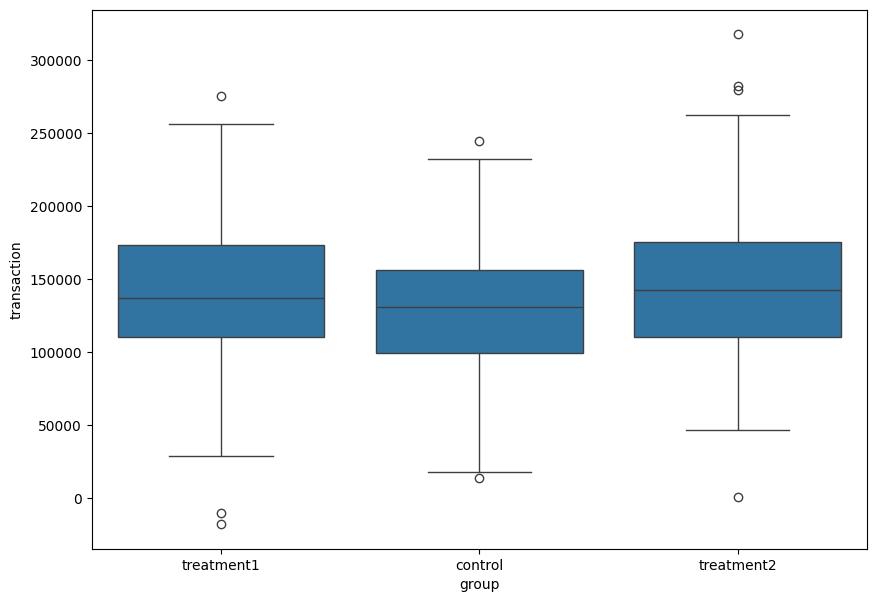

In [49]:
# import library
import seaborn as sns

# make boxplot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))
sns.boxplot(x = 'group',
            y = 'transaction',
            data = data,
            ax = ax)

plt.show()

In [50]:
# import library
from scipy.stats import f_oneway

# Conduct the one-way ANOVA
f_stat, p_value = f_oneway(data['transaction'][data['group'] == 'control'],
                           data['transaction'][data['group'] == 'treatment1'],
                           data['transaction'][data['group'] == 'treatment2'])


# print f-statistics of ANOVA
print(f"ANOVA f-statistics :{f_stat:0.5f}")

# print p-value
print(f"p-value            :{p_value:0.5f}")

ANOVA f-statistics :8.02893
p-value            :0.00036


In [51]:
# calculate critical value
import scipy

alpha = 0.05
dfb = 3-1       #degree of freedom between group (k-1) number of group - 1
dfw = 600-3     #degree of freedom within group (N-k) number of all sample - number of group

f_crit = scipy.stats.f.ppf(1-alpha,
                           dfb,
                           dfw)
f_crit

np.float64(3.010815204196057)

In [52]:
# import library
import statsmodels.api as sm
from statsmodels.formula.api import ols

# make model
formula = 'transaction ~ group'

# fit formula to model
model = ols(formula, data=data).fit()

# make anova table
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
group,3.539164e+10,2.0,8.028927,0.000362
Residual,1.315793e+12,597.0,NaN,NaN


In [53]:
#import library
import statsmodels.stats.multicomp as mc

#perform hsd test
comparison = mc.MultiComparison(data['transaction'], data['group'])
post_hoc_res = comparison.tukeyhsd()

#print result
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
control,treatment1,12656.975,0.0197,1626.4787,23687.4713,True
control,treatment2,18382.035,0.0003,7351.5387,29412.5313,True
treatment1,treatment2,5725.06,0.4421,-5305.4363,16755.5563,False


The decription about each column in the table output of HSD tukey are :
- **group1** and **group2** columns are the groups being compared
- **meandiff** is the difference between the group means
- **p-adj** is the corrected p-value which takes into account the multiple comparisons being conducted
- **lower** is the lower band of the confidence interval.
In the current example the confidence interval at the 95% level since $\alpha$ = 0.05.
- **upper** is the upper band of the confidence interval.
- **reject** is the decision rule based on the corrected p-value.

  Reject $H_0$ if p-adj < $\alpha(0.05)$

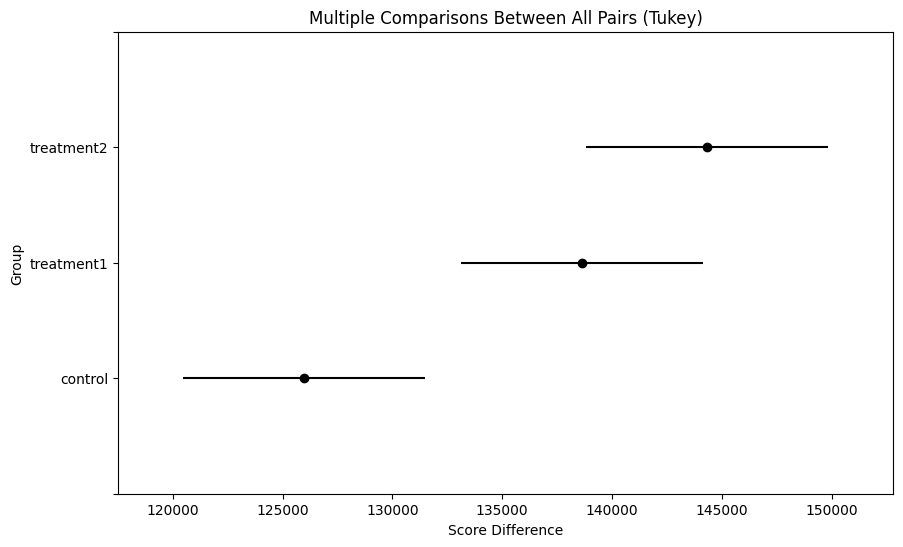

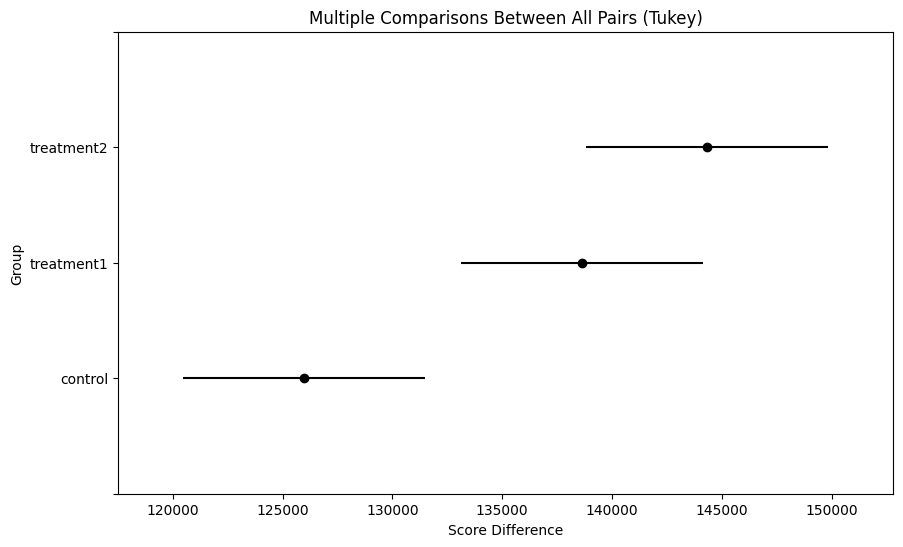

In [54]:
# plot difference
post_hoc_res.plot_simultaneous(ylabel= "Group", xlabel= "Score Difference")

**Conclusion**
- From the plot the difference, we can see that the best performance based on average of the amount of transaction using credit card is treatment2. So, treatment2 is become the winning version.



*Recommendation for Bank*

**If the bank will launch the feature if the average increase in transactions is 15000 per user. Will the bank launch treatment-2?**

- In this case, 15000 can be used as a practical significant limit determined by the bank.
- Therefore, we can compare the statistically significant limits represented by the mean different confident intervals of control and treatment2 with the practically significant limits.
- For HSD

post_hoc_res